In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pickle
from sklearn.model_selection import train_test_split
import joblib
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel('E:\Personal files\Data science and AI\Cluzters\Baseball Sports Analytics\data.xlsx', engine='openpyxl')
df

,YEAR,YRINDEX,PLAYERID,NAMElast,NAMEfirst,TEAM,League,League code,Games,At-bats,...,OBPcum_Lag1,SLGcum_Lag1,ABcum_Lag1,Rcum_Lag1,Hcum_Lag1,HRcum_Lag1,RBIcum_Lag1,PAcum_Lag1,OBcum_Lag1,TBcum_Lag1
0,1960,2,aaronha01,Aaron,Hank,ML1,NL,2,153,590,...,0.401154,0.635930,629,116,223,39,123,693,278,400
1,1961,3,aaronha01,Aaron,Hank,ML1,NL,2,155,603,...,0.377303,0.602133,1219,218,395,79,249,1357,512,734
2,1962,4,aaronha01,Aaron,Hank,ML1,NL,2,156,592,...,0.378392,0.599341,1822,333,592,113,369,2027,767,1092
3,1963,5,aaronha01,Aaron,Hank,ML1,NL,2,161,631,...,0.381218,0.603977,2414,460,783,158,497,2694,1027,1458
4,1964,6,aaronha01,Aaron,Hank,ML1,NL,2,145,570,...,0.383216,0.600328,3045,581,984,202,627,3408,1306,1828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520,1976,18,ziskri01,Zisk,Richie,PIT,NL,2,155,581,...,0.374609,0.481404,1425,194,432,48,235,1599,599,686
4521,1977,19,ziskri01,Zisk,Richie,CHA,AL,0,141,531,...,0.365625,0.476570,2006,285,600,69,324,2240,819,956
4522,1978,20,ziskri01,Zisk,Richie,TEX,AL,0,140,511,...,0.363284,0.484430,2537,363,754,99,425,2838,1031,1229
4523,1979,21,ziskri01,Zisk,Richie,TEX,AL,0,144,503,...,0.359004,0.475722,3048,431,888,121,510,3415,1226,1450


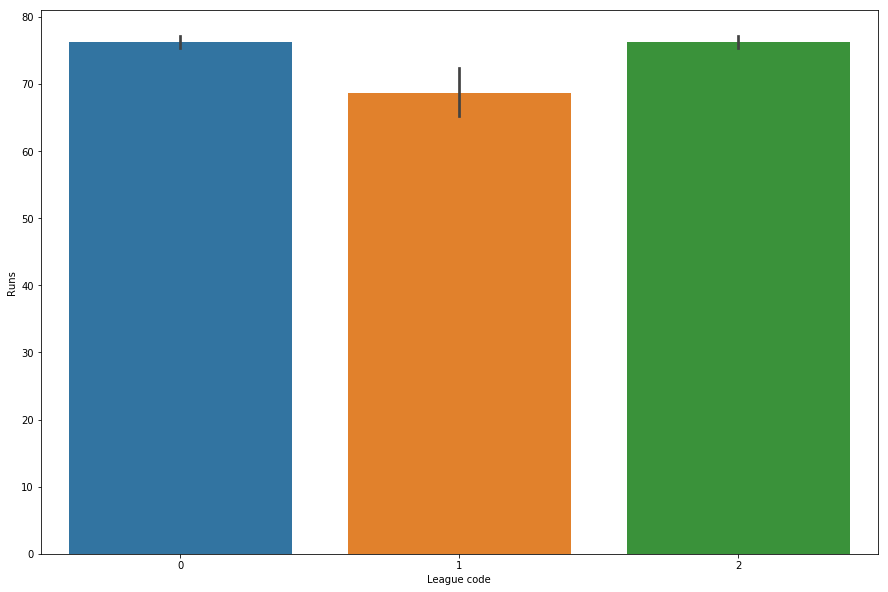

In [6]:
plt.figure(figsize=(15, 10))
sns.barplot(x="League code", y="Runs", data=df)

<function matplotlib.pyplot.show(*args, **kw)>

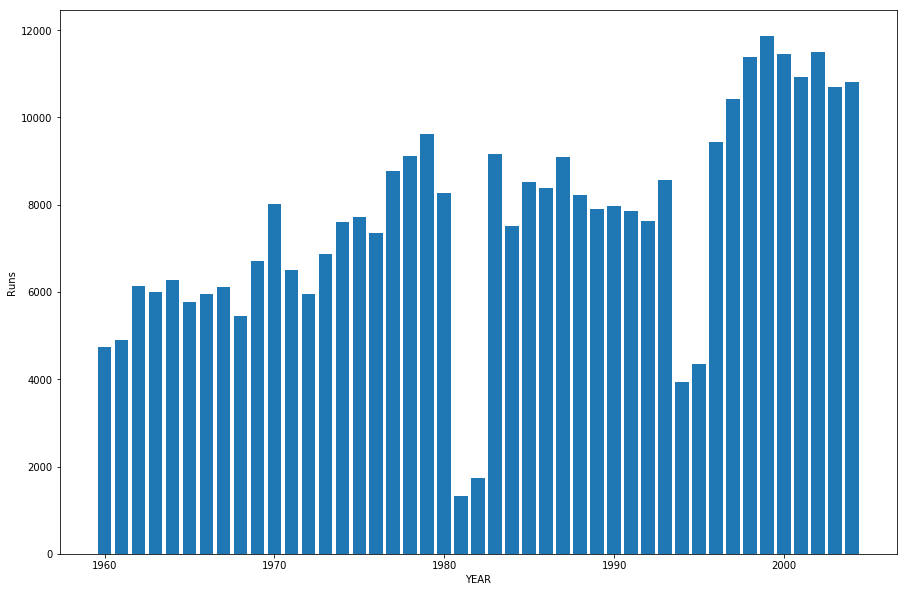

In [8]:
y = df.groupby('YEAR')['Runs'].sum()
plt.figure(figsize=(15,10))
plt.bar(y.index,y)
plt.xlabel('YEAR')
plt.ylabel('Runs')
plt.show

In [4]:
df.isnull().values.any()

False

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4535 entries, 0 to 4534
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   YEAR                             4535 non-null   int64  
 1   YRINDEX                          4535 non-null   int64  
 2   PLAYERID                         4535 non-null   object 
 3   NAMElast                         4535 non-null   object 
 4   NAMEfirst                        4535 non-null   object 
 5   TEAM                             4535 non-null   object 
 6   League                           4535 non-null   object 
 7   League code                      4535 non-null   int64  
 8   Games                            4535 non-null   int64  
 9   At-bats                          4535 non-null   int64  
 10  Runs                             4535 non-null   int64  
 11  Hits                             4535 non-null   int64  
 12  Home runs           

In [6]:
NAMElast_encoder=LabelEncoder()
df['NAMElast'] = NAMElast_encoder.fit_transform(df['NAMElast'])
pickle.dump(NAMElast_encoder, open('NAMElast_encoder.pkl','wb'))

In [7]:
NAMEfirst_encoder=LabelEncoder()
df['NAMEfirst'] = NAMEfirst_encoder.fit_transform(df['NAMEfirst'])
pickle.dump(NAMEfirst_encoder, open('NAMEfirst_encoder.pkl','wb'))

In [8]:
TEAM_encoder=LabelEncoder()
df['TEAM'] = TEAM_encoder.fit_transform(df['TEAM'])
pickle.dump(TEAM_encoder, open('TEAM_encoder.pkl','wb'))

In [9]:
League_encoder=LabelEncoder()
df['League'] = League_encoder.fit_transform(df['League'])
pickle.dump(League_encoder, open('League_encoder.pkl','wb'))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4535 entries, 0 to 4534
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   YEAR                             4535 non-null   int64  
 1   YRINDEX                          4535 non-null   int64  
 2   PLAYERID                         4535 non-null   object 
 3   NAMElast                         4535 non-null   int32  
 4   NAMEfirst                        4535 non-null   int32  
 5   TEAM                             4535 non-null   int32  
 6   League                           4535 non-null   int32  
 7   League code                      4535 non-null   int64  
 8   Games                            4535 non-null   int64  
 9   At-bats                          4535 non-null   int64  
 10  Runs                             4535 non-null   int64  
 11  Hits                             4535 non-null   int64  
 12  Home runs           

In [11]:
X = df.drop(columns=['Runs', 'PLAYERID', 'YRINDEX'])
Y = df['Runs']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

pickle.dump(scaler, open('scaler.pkl','wb'))

In [16]:
from catboost import CatBoostRegressor


cb_model= CatBoostRegressor()
cb_model.fit(X_train, y_train)
y_pred = cb_model.predict(X_test)
cb_model.score(X_train, y_train)*100

Learning rate set to 0.049093
0:	learn: 19.9477409	total: 163ms	remaining: 2m 42s
1:	learn: 19.3227639	total: 167ms	remaining: 1m 23s
2:	learn: 18.7342394	total: 172ms	remaining: 57.2s
3:	learn: 18.1561224	total: 178ms	remaining: 44.2s
4:	learn: 17.5787573	total: 184ms	remaining: 36.6s
5:	learn: 17.0553296	total: 190ms	remaining: 31.5s
6:	learn: 16.5784714	total: 195ms	remaining: 27.7s
7:	learn: 16.1351038	total: 200ms	remaining: 24.8s
8:	learn: 15.7120242	total: 204ms	remaining: 22.5s
9:	learn: 15.3064340	total: 210ms	remaining: 20.8s
10:	learn: 14.9043455	total: 217ms	remaining: 19.5s
11:	learn: 14.5440302	total: 223ms	remaining: 18.4s
12:	learn: 14.1965454	total: 230ms	remaining: 17.4s
13:	learn: 13.8738750	total: 237ms	remaining: 16.7s
14:	learn: 13.5558225	total: 243ms	remaining: 16s
15:	learn: 13.2499970	total: 249ms	remaining: 15.3s
16:	learn: 12.9658497	total: 254ms	remaining: 14.7s
17:	learn: 12.6978647	total: 260ms	remaining: 14.2s
18:	learn: 12.4454781	total: 265ms	remaining

163:	learn: 7.1398789	total: 1.06s	remaining: 5.42s
164:	learn: 7.1358850	total: 1.07s	remaining: 5.41s
165:	learn: 7.1301136	total: 1.07s	remaining: 5.4s
166:	learn: 7.1246211	total: 1.08s	remaining: 5.39s
167:	learn: 7.1193640	total: 1.09s	remaining: 5.39s
168:	learn: 7.1122913	total: 1.09s	remaining: 5.38s
169:	learn: 7.1032744	total: 1.1s	remaining: 5.37s
170:	learn: 7.0947348	total: 1.11s	remaining: 5.37s
171:	learn: 7.0898137	total: 1.11s	remaining: 5.35s
172:	learn: 7.0826917	total: 1.12s	remaining: 5.34s
173:	learn: 7.0750694	total: 1.12s	remaining: 5.32s
174:	learn: 7.0644836	total: 1.13s	remaining: 5.31s
175:	learn: 7.0603208	total: 1.13s	remaining: 5.29s
176:	learn: 7.0509105	total: 1.14s	remaining: 5.28s
177:	learn: 7.0424401	total: 1.14s	remaining: 5.26s
178:	learn: 7.0353479	total: 1.15s	remaining: 5.25s
179:	learn: 7.0317112	total: 1.15s	remaining: 5.24s
180:	learn: 7.0260850	total: 1.16s	remaining: 5.23s
181:	learn: 7.0222006	total: 1.16s	remaining: 5.22s
182:	learn: 7.

326:	learn: 6.0552471	total: 1.93s	remaining: 3.98s
327:	learn: 6.0481182	total: 1.94s	remaining: 3.97s
328:	learn: 6.0444366	total: 1.94s	remaining: 3.96s
329:	learn: 6.0392430	total: 1.95s	remaining: 3.96s
330:	learn: 6.0321111	total: 1.95s	remaining: 3.95s
331:	learn: 6.0242346	total: 1.96s	remaining: 3.94s
332:	learn: 6.0199350	total: 1.96s	remaining: 3.93s
333:	learn: 6.0155736	total: 1.97s	remaining: 3.93s
334:	learn: 6.0082191	total: 1.97s	remaining: 3.92s
335:	learn: 6.0012793	total: 1.98s	remaining: 3.91s
336:	learn: 5.9985965	total: 1.98s	remaining: 3.9s
337:	learn: 5.9909090	total: 1.99s	remaining: 3.89s
338:	learn: 5.9827814	total: 1.99s	remaining: 3.89s
339:	learn: 5.9783491	total: 2s	remaining: 3.88s
340:	learn: 5.9709673	total: 2s	remaining: 3.87s
341:	learn: 5.9667801	total: 2.01s	remaining: 3.86s
342:	learn: 5.9614260	total: 2.01s	remaining: 3.85s
343:	learn: 5.9538615	total: 2.02s	remaining: 3.85s
344:	learn: 5.9478628	total: 2.02s	remaining: 3.84s
345:	learn: 5.94090

495:	learn: 5.1792227	total: 2.99s	remaining: 3.04s
496:	learn: 5.1746123	total: 3s	remaining: 3.04s
497:	learn: 5.1678053	total: 3.01s	remaining: 3.03s
498:	learn: 5.1629991	total: 3.02s	remaining: 3.03s
499:	learn: 5.1582968	total: 3.02s	remaining: 3.02s
500:	learn: 5.1558420	total: 3.03s	remaining: 3.02s
501:	learn: 5.1526940	total: 3.03s	remaining: 3.01s
502:	learn: 5.1480799	total: 3.04s	remaining: 3s
503:	learn: 5.1429063	total: 3.05s	remaining: 3s
504:	learn: 5.1375747	total: 3.05s	remaining: 2.99s
505:	learn: 5.1348584	total: 3.06s	remaining: 2.99s
506:	learn: 5.1314180	total: 3.06s	remaining: 2.98s
507:	learn: 5.1274094	total: 3.07s	remaining: 2.97s
508:	learn: 5.1259150	total: 3.08s	remaining: 2.97s
509:	learn: 5.1253305	total: 3.08s	remaining: 2.96s
510:	learn: 5.1204319	total: 3.09s	remaining: 2.96s
511:	learn: 5.1169656	total: 3.1s	remaining: 2.95s
512:	learn: 5.1153027	total: 3.11s	remaining: 2.95s
513:	learn: 5.1111705	total: 3.11s	remaining: 2.94s
514:	learn: 5.1072422	

664:	learn: 4.5312062	total: 4.05s	remaining: 2.04s
665:	learn: 4.5273235	total: 4.06s	remaining: 2.03s
666:	learn: 4.5234184	total: 4.06s	remaining: 2.03s
667:	learn: 4.5165844	total: 4.07s	remaining: 2.02s
668:	learn: 4.5116698	total: 4.07s	remaining: 2.02s
669:	learn: 4.5055637	total: 4.08s	remaining: 2.01s
670:	learn: 4.5003709	total: 4.09s	remaining: 2s
671:	learn: 4.4965267	total: 4.09s	remaining: 2s
672:	learn: 4.4911930	total: 4.1s	remaining: 1.99s
673:	learn: 4.4882993	total: 4.11s	remaining: 1.99s
674:	learn: 4.4841019	total: 4.11s	remaining: 1.98s
675:	learn: 4.4805016	total: 4.12s	remaining: 1.97s
676:	learn: 4.4747588	total: 4.12s	remaining: 1.97s
677:	learn: 4.4703688	total: 4.13s	remaining: 1.96s
678:	learn: 4.4678310	total: 4.14s	remaining: 1.96s
679:	learn: 4.4640885	total: 4.14s	remaining: 1.95s
680:	learn: 4.4614786	total: 4.15s	remaining: 1.94s
681:	learn: 4.4570831	total: 4.16s	remaining: 1.94s
682:	learn: 4.4539708	total: 4.16s	remaining: 1.93s
683:	learn: 4.45009

829:	learn: 3.9431737	total: 5.09s	remaining: 1.04s
830:	learn: 3.9408658	total: 5.1s	remaining: 1.04s
831:	learn: 3.9372878	total: 5.1s	remaining: 1.03s
832:	learn: 3.9336673	total: 5.11s	remaining: 1.02s
833:	learn: 3.9313159	total: 5.11s	remaining: 1.02s
834:	learn: 3.9286014	total: 5.12s	remaining: 1.01s
835:	learn: 3.9257410	total: 5.13s	remaining: 1s
836:	learn: 3.9213261	total: 5.13s	remaining: 1000ms
837:	learn: 3.9178965	total: 5.14s	remaining: 993ms
838:	learn: 3.9139431	total: 5.14s	remaining: 987ms
839:	learn: 3.9101618	total: 5.15s	remaining: 981ms
840:	learn: 3.9042142	total: 5.16s	remaining: 975ms
841:	learn: 3.9005781	total: 5.16s	remaining: 969ms
842:	learn: 3.8969532	total: 5.17s	remaining: 963ms
843:	learn: 3.8942517	total: 5.17s	remaining: 957ms
844:	learn: 3.8902151	total: 5.18s	remaining: 950ms
845:	learn: 3.8861174	total: 5.19s	remaining: 944ms
846:	learn: 3.8836556	total: 5.19s	remaining: 938ms
847:	learn: 3.8809689	total: 5.2s	remaining: 932ms
848:	learn: 3.878

993:	learn: 3.4529989	total: 6.32s	remaining: 38.2ms
994:	learn: 3.4497299	total: 6.33s	remaining: 31.8ms
995:	learn: 3.4454488	total: 6.33s	remaining: 25.4ms
996:	learn: 3.4425453	total: 6.34s	remaining: 19.1ms
997:	learn: 3.4387629	total: 6.35s	remaining: 12.7ms
998:	learn: 3.4353441	total: 6.36s	remaining: 6.36ms
999:	learn: 3.4332002	total: 6.36s	remaining: 0us


97.21699686814316

In [17]:
print('r2 score', r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2 score 0.8697332602826724
MAE: 5.862355451829096
MSE: 55.66649932333321
RMSE: 7.460998547334881


In [18]:
joblib.dump(cb_model, 'model.h5') 

['model.h5']